In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Read the CSV file and make a copy:

In [2]:
df = pd.read_csv('1632300362534233.csv') # The original dataframe
print('Number of rows:' ,len(df))
# print(df.to_string())
ddf = pd.read_csv('1632300362534233.csv') #make a copy
print(ddf.head())
# print(ddf['Area'].head())
# print(df.sort_values(by=['Address']))

Number of rows: 3479
  Area  Room  Parking  Warehouse  Elevator         Address         Price  \
0   63     1     True       True      True         Shahran  1.850000e+09   
1   60     1     True       True      True         Shahran  1.850000e+09   
2   79     2     True       True      True          Pardis  5.500000e+08   
3   95     2     True       True      True   Shahrake Qods  9.025000e+08   
4  123     2     True       True      True  Shahrake Gharb  7.000000e+09   

   Price(USD)  
0    61666.67  
1    61666.67  
2    18333.33  
3    30083.33  
4   233333.33  


In [3]:
#### convert every item in 'Area' column to integer:

ddf = ddf.replace({'Area': r','}, {'Area': ''}, regex=True)
ddf = ddf.replace({'Area': r' '}, {'Area': ''}, regex=True)

# print(ddf['Area'].to_string())

ddf['Area'] = ddf['Area'].astype(int)

print(ddf['Area'].head())

0     63
1     60
2     79
3     95
4    123
Name: Area, dtype: int64


In [4]:

count1 = 0
count2 = 0
count3 = 0
count4 = 0
row = 0
for i in ddf['Area']:
    if  0 < i <=200:
        count1 +=1
    elif  200 < i <= 400:
        count2 +=1
    elif 400 < i < 1000:
        count3 +=1
        
    else:
        print(i)
        count4 +=1
print(count1 , count2 , count3 , count4)
print(count1 + count2 + count3 + count4 , len(ddf))

#### So Areas > 3600 are junk files! 
#### I also delete the row with Area = 3600 for fitting better!

3310000000
16160000000
1000
8400000000
3600
2550000000
3282 160 31 6
3479 3479


### Delete specifice rows to manage Dataset

In [5]:
a = len(df)
row = 0
for i in ddf['Area']:
    # print(i)
    if i > 3000:
        ddf.drop(row , axis = 0 , inplace= True)
    row +=1
ddf=ddf.dropna(axis=0)
ddf.reset_index(drop=True, inplace=True)
b = len(ddf)
print('Number of rows after modification:' , len(ddf))
print(a-b , 'rows have been deleted after modifications in Area and Address columns')
# print(ddf.sort_values(by=['Address']).to_string())


Number of rows after modification: 3451
28 rows have been deleted after modifications in Area and Address columns


In [6]:
cdf = ddf[['Area' , 'Room' , 'Price' , 'Price(USD)' , 'Address']]
print(cdf.head())


   Area  Room         Price  Price(USD)         Address
0    63     1  1.850000e+09    61666.67         Shahran
1    60     1  1.850000e+09    61666.67         Shahran
2    79     2  5.500000e+08    18333.33          Pardis
3    95     2  9.025000e+08    30083.33   Shahrake Qods
4   123     2  7.000000e+09   233333.33  Shahrake Gharb


### plot Area Vs. Price

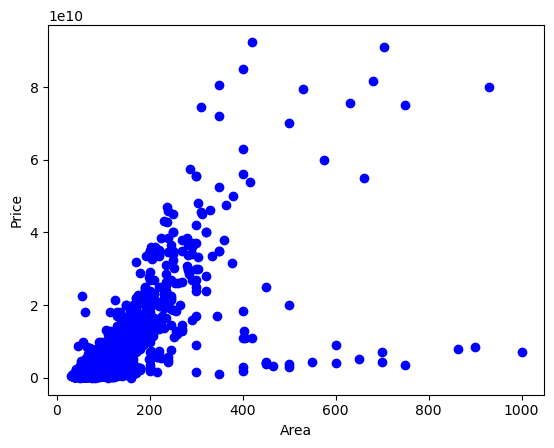

In [7]:
plt.scatter(cdf.Area , cdf.Price , color = 'blue')
plt.xlabel('Area')
plt.ylabel('Price')
plt.savefig('Area_Price.png', bbox_inches = 'tight')

plt.show()

### We can see a patter between Area of a house and its Price! what about Rooms?

### Classify data by rooms:

In [8]:

d = {}
# print(len(cdf))
for x in cdf['Room']:
    d["Rooms: {0}".format(x)] = cdf.loc[cdf['Room'] == x]
# print(d)
myKeys = list(d.keys())
myKeys =sorted(myKeys)
# print(myKeys)
d = {i: d[i] for i in myKeys}
 
# print(d.keys())
# print(d['Rooms: 0'])


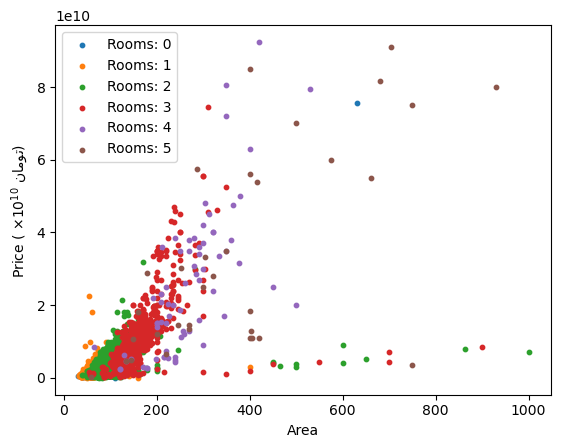

In [9]:
from bidi.algorithm import get_display
from arabic_reshaper import reshape
for x in d:
    plt.scatter( d[x].Area , d[x].Price , s = 10,label = x)

label = r'Price ( $\times 10^{10}$ تومان) '
plt.xlabel("Area")
plt.ylabel(get_display(reshape(label)))
plt.legend(loc='upper left')
plt.rcParams["figure.figsize"] = (8,6)
plt.savefig('Area_Price_room.png', bbox_inches = 'tight')

plt.show()


### plot Address Vs. Price:

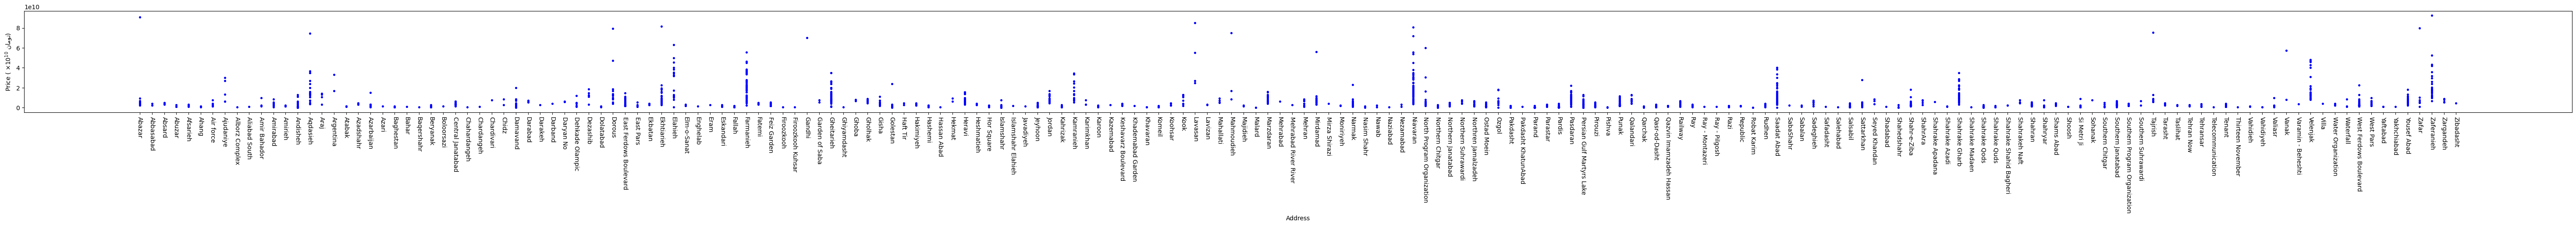

In [30]:
ccdf =cdf # make a copy
ccdf = ccdf.sort_values(by= 'Address')
plt.scatter(ccdf.Address , ccdf.Price , color = 'blue' , s=7 )
ax = plt.gca()
for tick in ax.get_xticklabels():
    tick.set_rotation(270)
plt.xlabel('Address')
label = r'Price ( $\times 10^{10}$ تومان) '
plt.ylabel(get_display(reshape(label)))
plt.rcParams["figure.figsize"] = (75,3)
plt.savefig('Addres_Price.png', bbox_inches = 'tight')

plt.show()
plt.close()
# plt.savefig('foo.pdf')


### We can conclude that there is no direct relationship between the Address of a house and its Price!

#### spliting elevator = T and elevator = F

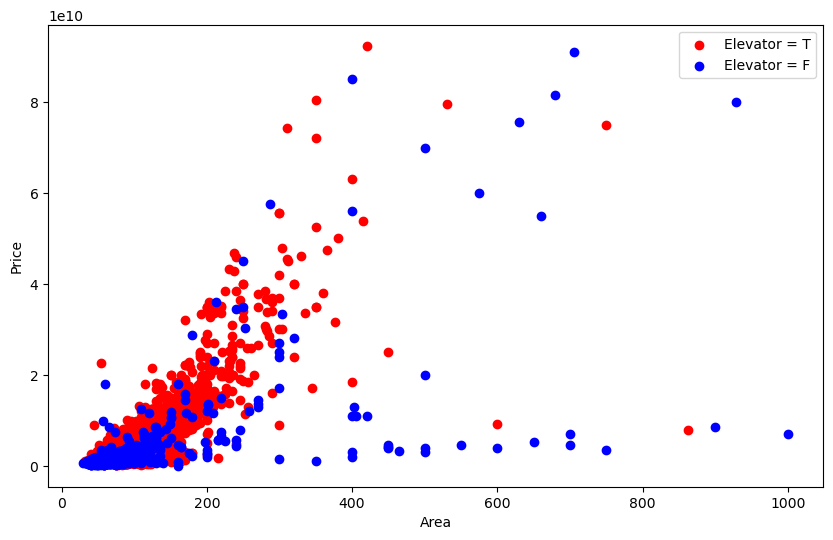

In [32]:
import matplotlib.pyplot as plt
mask = (ddf['Elevator'] == True)
elevT = ddf[mask]
elevF = ddf[~mask]
# print(elevF)

plt.scatter(elevT.Area , elevT.Price , color = 'red' , label = 'Elevator = T')
plt.scatter(elevF.Area , elevF.Price , color = 'blue' , label = 'Elevator = F')

plt.legend(loc = 'upper right')
plt.xlabel('Area')
plt.ylabel('Price')
plt.rcParams["figure.figsize"] = (10,6)
plt.savefig('Area_Price_Elevator.png', bbox_inches = 'tight')

plt.show()



# Creating train and test dataset


In [12]:
def per(x , y):
    z = x/y
    g = float("{:.2f}".format(z))
    return g


msk = np.random.rand(len(cdf)) < 0.8
train = cdf[msk]
test = cdf [~msk]
# print(test)


print('number of train rows are' , len(train)  , 'and percentage is: ' ,  per(len(train) , len(cdf)))
print('number of test rows are' , len(test)  , 'and percentage is: ' ,  per(len(test) , len(cdf)))

number of train rows are 2793 and percentage is:  0.81
number of test rows are 658 and percentage is:  0.19


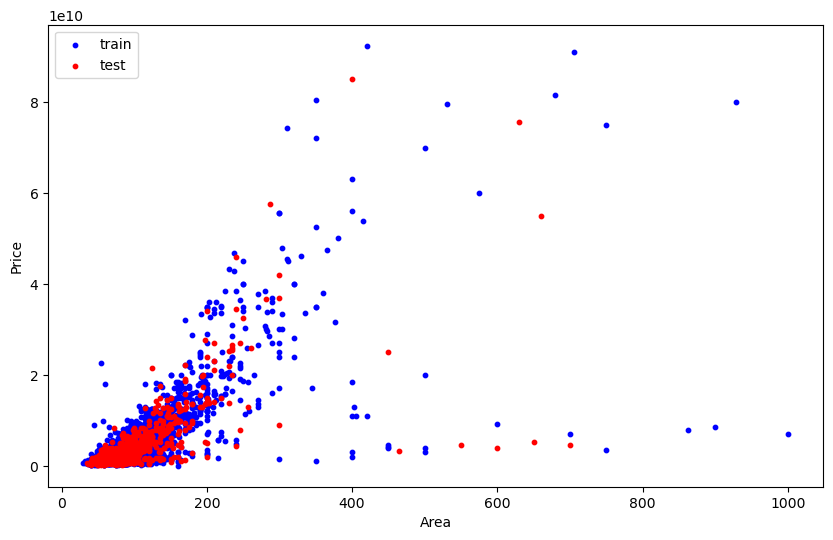

In [13]:
plt.scatter(train.Area, train.Price,  color='blue' , label = 'train' , s =10)
plt.scatter(test.Area, test.Price,  color='red' , label = 'test' , s=10)

plt.xlabel("Area")
plt.ylabel("Price")
plt.legend(loc='upper left')
plt.savefig('train_test.png', bbox_inches = 'tight')


plt.show()

#### Modeling

Using sklearn package to model data.

First try Linear Regression by only one variable (Simple Linear Regression)

#### Area as simple variable


Coefficients:  [[0.89763268]]
Intercept:  [-0.03752153]
max of Price is: [9.24e+10]
max of area is: [1000]


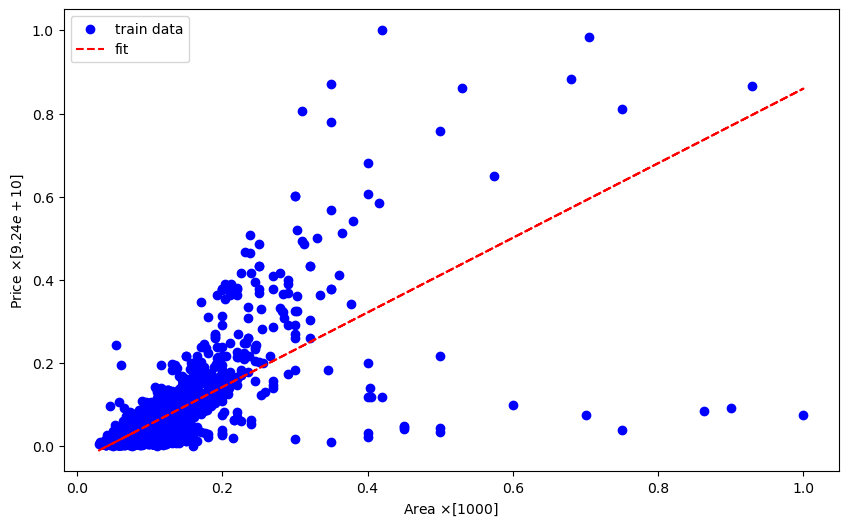

In [14]:
### divided by max
from sklearn import linear_model

regr = linear_model.LinearRegression()
xmax =  max(np.asanyarray(train[['Area']]))
ymax = max(np.asanyarray(train[['Price']]))

x_train = np.asanyarray(train[['Area']]) /xmax
y_train = np.asanyarray(train[['Price']]) / max(np.asanyarray(train[['Price']]))
regr.fit(x_train , y_train)
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)
print('max of Price is:' ,ymax)
print( 'max of area is:', xmax)



plt.scatter(x_train , y_train , color = 'blue' , label = 'train data')
plt.plot(x_train , regr.intercept_[0] + regr.coef_[0][0]*x_train , 'r--' , label = 'fit')

plt.legend(loc = 'upper left')
plt.xlabel(r"Area $\times {0}$".format(xmax))
plt.ylabel(r"Price $\times {0}$".format(ymax))
plt.savefig('train_fit_simple.png', bbox_inches = 'tight')

plt.show()

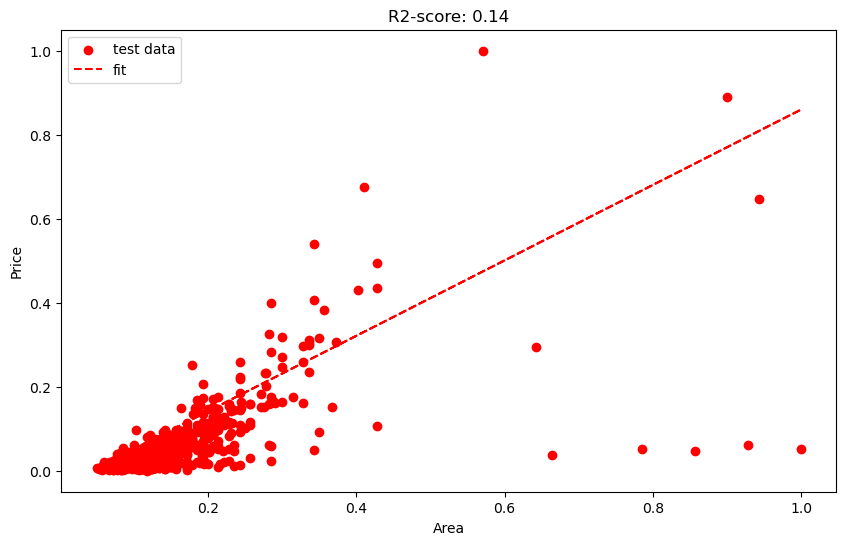

Mean absolute error: 0.05
Residual sum of squares (MSE): 0.007219597
R2-score: 0.14


In [15]:
from sklearn.metrics import r2_score

xmax =  max(np.asanyarray(test[['Area']]))
ymax = max(np.asanyarray(test[['Price']]))

x_test = np.asanyarray(test[['Area']])/xmax
y_test = np.asanyarray(test[['Price']])/ymax #data test for emission
y_hat = regr.predict(x_test) #predict test for emission. regr fitted before



plt.scatter(x_test , y_test , color = 'red' , label = 'test data')
plt.plot(x_test , regr.intercept_[0] + regr.coef_[0][0]*x_test , 'r--' , label = 'fit')
r2 =  r2_score(y_test , y_hat) 
plt.legend(loc = 'upper left')
plt.xlabel("Area")
plt.ylabel("Price")
plt.title("R2-score: %.2f" % r2_score(y_test , y_hat))
plt.savefig('test_fit_simple.png', bbox_inches = 'tight')

plt.show()


print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - y_test)))
print("Residual sum of squares (MSE): %.9f" % np.mean((y_hat - y_test) ** 2))
print("R2-score: %.2f" % r2_score(y_test , y_hat) )

### R2-Evaluation with simple Linear Regression (Area) is 0.51

### now we use room as our simple variable for fitting!


In [16]:
def per(x , y):
    z = x/y
    g = float("{:.2f}".format(z))
    return g


msk = np.random.rand(len(ddf)) < 0.8
train = ddf[msk]
test = ddf [~msk]
# print(test)


print('number of train rows are' , len(train)  , 'and percentage is: ' ,  per(len(train) , len(ddf)))
print('number of test rows are' , len(test)  , 'and percentage is: ' ,  per(len(test) , len(ddf)))

number of train rows are 2752 and percentage is:  0.8
number of test rows are 699 and percentage is:  0.2


Coefficients:  [[0.06832709]]
Intercept:  [-0.08326001]


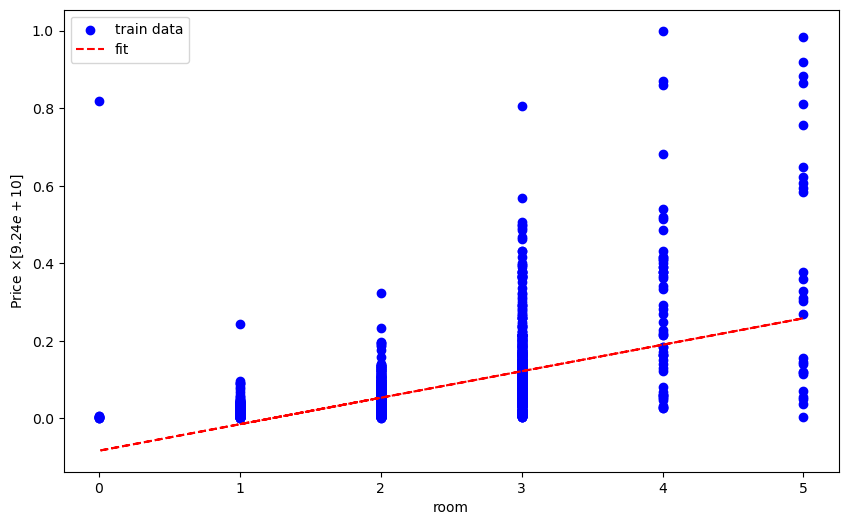

In [17]:

from sklearn import linear_model
regr = linear_model.LinearRegression()

ymax = max(np.asanyarray(train[['Price']]))

train_x = np.asanyarray(train[['Room']])
train_y = np.asanyarray(train[['Price']]) / ymax
regr.fit(train_x , train_y)
print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

plt.scatter(train_x , train_y , color = 'blue' , label = 'train data')
plt.plot(train_x , regr.intercept_[0] + regr.coef_[0][0]*train_x , 'r--' , label = 'fit')

plt.legend(loc = 'upper left')

plt.xlabel('room')
plt.ylabel(r"Price $\times {0}$".format(ymax))
plt.show()

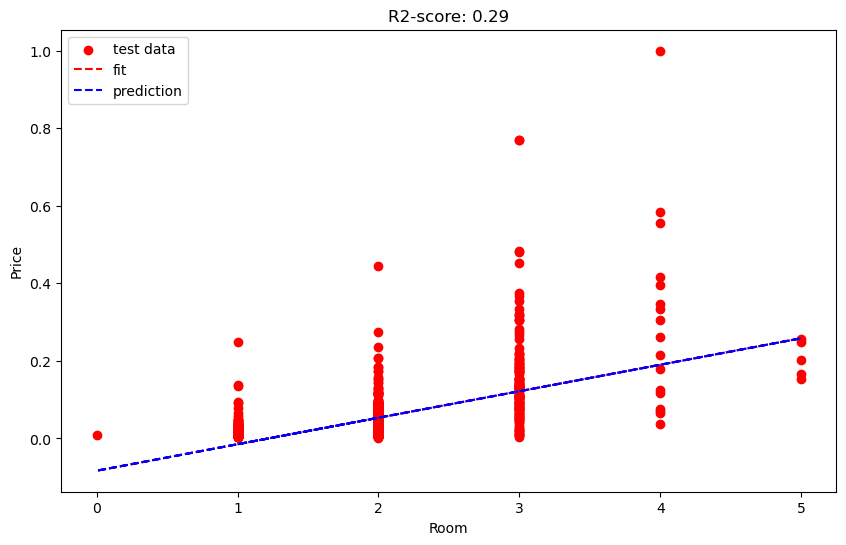

Mean absolute error: 0.05
Residual sum of squares (MSE): 0.006337453
R2-score: 0.29


In [18]:
from sklearn.metrics import r2_score

ymax = max(np.asanyarray(test[['Price']]))

x_test = np.asanyarray(test[['Room']])
y_test = np.asanyarray(test[['Price']])/ymax #data test for emission
y_hat = regr.predict(x_test) #predict test for emission. regr fitted before



plt.scatter(x_test , y_test , color = 'red' , label = 'test data')
plt.plot(x_test , regr.intercept_[0] + regr.coef_[0][0]*x_test , 'r--' , label = 'fit')
#or 
plt.plot(x_test ,y_hat , 'b--' , label = 'prediction')

plt.legend(loc = 'upper left')
plt.xlabel("Room")
plt.ylabel("Price")
plt.title("R2-score: %.2f" % r2_score(y_test , y_hat))

plt.show()


print("Mean absolute error: %.2f" % np.mean(np.absolute(y_hat - y_test)))
print("Residual sum of squares (MSE): %.9f" % np.mean((y_hat - y_test) ** 2))
print("R2-score: %.2f" % r2_score(y_test , y_hat) )

### R2-Evaluation with simple Linear Regression (Room) is 0.29
so clearly there is no direct relationship between rooms and Price itsself!





### Now try Linear Regression by multiple variables (Multiple Linear Regression)
tip: to fit, we have to change Columns type(str) to int-type by using (from sklearn import preprocessing)

In [19]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
# dddf = ddf # make a copy
# dddf = dddf.sort_values(by = 'Address')
# print(dddf.head)
ids = le.fit(ddf['Address'])
###############################
# print(mapping) keep a dictionary from converting Address to int


mapping = dict(zip(le.classes_, range(len(le.classes_))))


#################################
# print(le.transform(dddf['Address']))



# print(le.classes_)
# print('There are ' , len(le.classes_) , 'types of Address in our data') ### how many types of adderess?
ddf['Address'] = le.transform(ddf['Address'])
le = preprocessing.LabelEncoder()
le.fit(ddf['Parking'])
ddf['Parking'] = le.transform(ddf['Parking'])
le.fit(ddf['Warehouse'])
ddf['Warehouse'] = le.transform(ddf['Warehouse'])
le.fit(ddf['Elevator'])
ddf['Elevator'] = le.transform(ddf['Elevator'])
# print(ddf)
print(ddf.tail())





      Area  Room  Parking  Warehouse  Elevator  Address         Price  \
3446    86     2        1          1         1      163  3.500000e+09   
3447    83     2        1          1         1      105  6.800000e+09   
3448    75     2        0          0         0      115  3.650000e+08   
3449   105     2        1          1         1       39  5.600000e+09   
3450    82     2        0          1         1      115  3.600000e+08   

      Price(USD)  
3446   116666.67  
3447   226666.67  
3448    12166.67  
3449   186666.67  
3450    12000.00  


In [20]:
print(mapping)

{'Abazar': 0, 'Abbasabad': 1, 'Absard': 2, 'Abuzar': 3, 'Afsarieh': 4, 'Ahang': 5, 'Air force': 6, 'Ajudaniye': 7, 'Alborz Complex': 8, 'Aliabad South': 9, 'Amir Bahador': 10, 'Amirabad': 11, 'Amirieh': 12, 'Andisheh': 13, 'Aqdasieh': 14, 'Araj': 15, 'Argentina': 16, 'Atabak': 17, 'Azadshahr': 18, 'Azarbaijan': 19, 'Azari': 20, 'Baghestan': 21, 'Bahar': 22, 'Baqershahr': 23, 'Beryanak': 24, 'Boloorsazi': 25, 'Central Janatabad': 26, 'Chahardangeh': 27, 'Chardangeh': 28, 'Chardivari': 29, 'Chidz': 30, 'Damavand': 31, 'Darabad': 32, 'Darakeh': 33, 'Darband': 34, 'Daryan No': 35, 'Dehkade Olampic': 36, 'Dezashib': 37, 'Dolatabad': 38, 'Dorous': 39, 'East Ferdows Boulevard': 40, 'East Pars': 41, 'Ekbatan': 42, 'Ekhtiarieh': 43, 'Elahieh': 44, 'Elm-o-Sanat': 45, 'Enghelab': 46, 'Eram': 47, 'Eskandari': 48, 'Fallah': 49, 'Farmanieh': 50, 'Fatemi': 51, 'Feiz Garden': 52, 'Firoozkooh': 53, 'Firoozkooh Kuhsar': 54, 'Gandhi': 55, 'Garden of Saba': 56, 'Gheitarieh': 57, 'Ghiyamdasht': 58, 'Ghoba'

In [21]:
def per(x , y):
    z = x/y
    g = float("{:.2f}".format(z))
    return g


msk = np.random.rand(len(ddf)) < 0.8
train = ddf[msk]
test = ddf [~msk]
# print(test)


print('number of train rows are' , len(train)  , 'and percentage is: ' ,  per(len(train) , len(ddf)))
print('number of test rows are' , len(test)  , 'and percentage is: ' ,  per(len(test) , len(ddf)))

number of train rows are 2767 and percentage is:  0.8
number of test rows are 684 and percentage is:  0.2


In [22]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

ymax = max(np.asanyarray(train[['Price']]))

x_train = np.asanyarray(train[['Area','Room','Parking' , 'Warehouse' , 'Elevator' , 'Address']])
y_train = np.asanyarray(train[['Price']]) /ymax
regr.fit (x_train, y_train)

print ('Coefficients: ', regr.coef_)
print ('Intercept: ',regr.intercept_)

Coefficients:  [[ 8.08720237e-04  1.26852086e-02 -3.42923290e-03  9.40912697e-03
   1.25517472e-02  1.14503340e-05]]
Intercept:  [-0.07203953]


In [23]:
from sklearn.metrics import r2_score

ymax = max(np.asanyarray(test[['Price']]))

x_test = np.asanyarray(test[['Area','Room','Parking' , 'Warehouse' , 'Elevator' , 'Address']])
y_test = np.asanyarray(test[['Price']]) / ymax
y_hat= regr.predict(x_test)

print("Residual sum of squares: %.5f"
      % np.mean((y_hat - y_test) ** 2))

# Explained variance score: 1 is perfect prediction
# print('Variance score: %.2f' % regr.score(x_test, y_test))
print("R2-score: %.2f" % r2_score(y_test , y_hat) )

Residual sum of squares: 0.00633
R2-score: 0.42


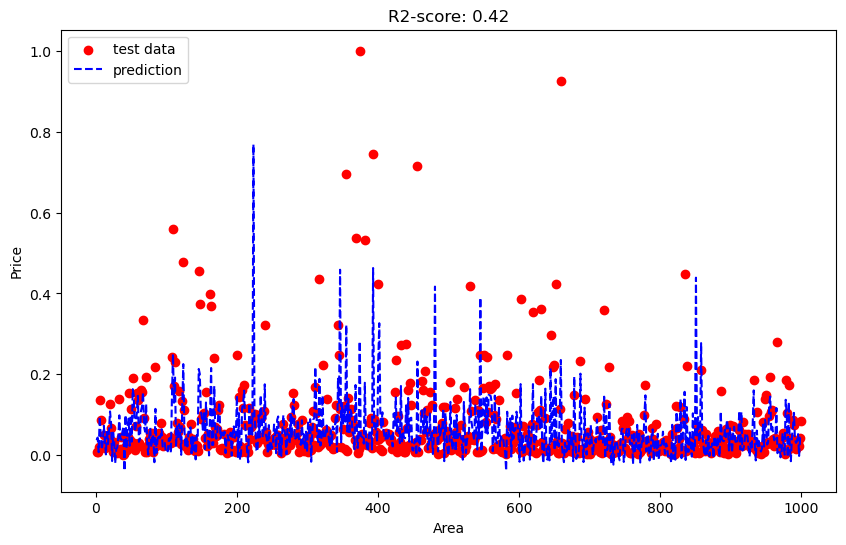

In [24]:

X = np.linspace(1, 1000, len(y_hat))

plt.scatter( X, y_test , color = 'red' , label = 'test data')
plt.plot(X ,y_hat , 'b--' , label = 'prediction')

plt.title("R2-score: %.2f" % r2_score(y_test , y_hat))
plt.legend(loc = 'upper left')
plt.xlabel("Area")
plt.ylabel("Price")
plt.savefig('test_fit_multiple.png', bbox_inches = 'tight')

plt.show()

# Predict your house price:


## see mapping dictionary to convert your town to a integer
also please enter Elevator, Parking and Warehouse as 1 or 0 (True or False!)

In [34]:
x_pre = np.asanyarray([[int(input('Enter Area: ')),int(input('Enter Rooms: ')),int(input('Enter Parking (enter 1 if true & enter 0 if False): ')) , int(input('Enter Warehouse (enter 1 if true & enter 0 if False): ')) , int(input('Enter Elevator (enter 1 if true & enter 0 if False): ')) , int(input('Enter your town code from 0 to 190: '))]])
pre = regr.predict(x_pre)
pre = pre[0,0]*ymax[0]
# print("%.1f" % floatNumber)

print('the prediction of your house price is %.2f toman' % pre )

the prediction of your house price is 3455350512.33 toman
